## Fig 2: ORF8 KO'ed more than any other gene

In [85]:
import os
from Bio import SeqIO
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as asns
import scipy.stats as st

In [2]:
os.chdir('/Users/cwagner2/Work/projects/covid/long-deletions')

In [17]:
#ko_df = pd.read_csv('nextstrain_build/results/WA_20k/ko_with_amplicon.tsv',sep='\t')
ko_df = pd.read_csv('results/gisaid.washington_ko_meta.tsv',sep='\t')
ko_df_ampl = pd.read_csv('results/gisaid.washington_ko_withAmplicons_meta.tsv',sep='\t')
ref = SeqIO.read('sars2_ref.gb','gb')

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_22296/3614912476.py:2: DtypeWarning: Columns (50,60,152,178) have mixed types. Specify dtype option on import or set low_memory=False.
  ko_df = pd.read_csv('results/gisaid.washington_ko_meta.tsv',sep='\t')
/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_22296/3614912476.py:3: DtypeWarning: Columns (50,60,152,178) have mixed types. Specify dtype option on import or set low_memory=False.
  ko_df_ampl = pd.read_csv('results/gisaid.washington_ko_withAmplicons_meta.tsv',sep='\t')


In [18]:
genes = [feature.qualifiers['gene'][0] for feature in ref.features if feature.type == "CDS"]

In [77]:
def plot_bar(df, koType,ylab,cov=0.9,norm=False,path=None):
    fig, ax = plt.subplots(tight_layout=True)
    genes = []
    kos = []
    lengths = []
    for feature in ref.features:
        if feature.type == "CDS":
            name = feature.qualifiers['gene'][0]
            start = feature.location.start
            end = feature.location.end
            length = len(ref.seq[start:end].translate(to_stop=True))
            ko = df[df.coverage>=cov][name+'_koType']
            ko = df[name+'_koType']
            genes.append(name)
            kos.append(len(ko[(ko==koType)]))
            lengths.append(length)
    heights = np.asarray(kos)
    lengths = np.asarray(lengths)
    if norm == True:
        heights = heights/(lengths*len(df))
    ax.bar(genes,heights)
    ax.set_ylabel(ylab)
    ax.set_xticklabels(genes,rotation=90)
    if path:
        fig.savefig(path,dpi=300,bbox_inches='tight')
    return dict(zip(genes,heights))
        
def load_clusters(path):
    dataList = []
    for gene in genes:
        with open(path+'/clusters_'+gene+'.tsv','r') as f:
            df = pd.read_csv(f,sep='\t')
        values,counts = np.unique(df.cluster,return_counts=True)
        countDF = pd.DataFrame({'cluster':values,'clustSize':counts})
        typeDF = df[[gene+'_koType','cluster']].drop_duplicates().rename(columns={gene+'_koType':'koType'})
        df = df[['cluster','depth']].drop_duplicates().merge(countDF).merge(typeDF)
        df['gene'] = gene
        #data.append(counts)
        dataList.append(df)

    data = pd.concat(dataList)
    return data

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_22296/1695322636.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genes,rotation=90)


{'ORF1a': 45079,
 'ORF1b': 47939,
 'S': 44100,
 'ORF3a': 3677,
 'E': 4005,
 'M': 30666,
 'ORF6': 2073,
 'ORF7a': 14391,
 'ORF7b': 8822,
 'ORF8': 3845,
 'N': 13581,
 'ORF9b': 2096}

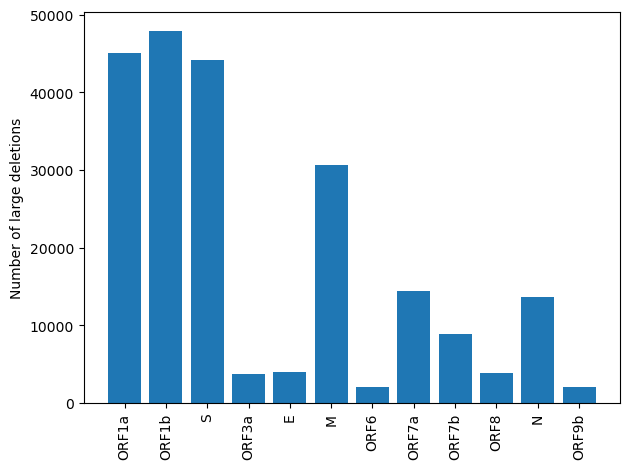

In [79]:
#plot_bar(ko_df,'BigDeletion','Number of large deletions',path='figs/fig2/ko_bigdeletion.pdf')
plot_bar(ko_df,'BigDeletion','Number of large deletions')

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_22296/1695322636.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genes,rotation=90)


{'ORF1a': 45079,
 'ORF1b': 47939,
 'S': 44100,
 'ORF3a': 3677,
 'E': 4005,
 'M': 30666,
 'ORF6': 2073,
 'ORF7a': 14391,
 'ORF7b': 10424,
 'ORF8': 5131,
 'N': 13589,
 'ORF9b': 2104}

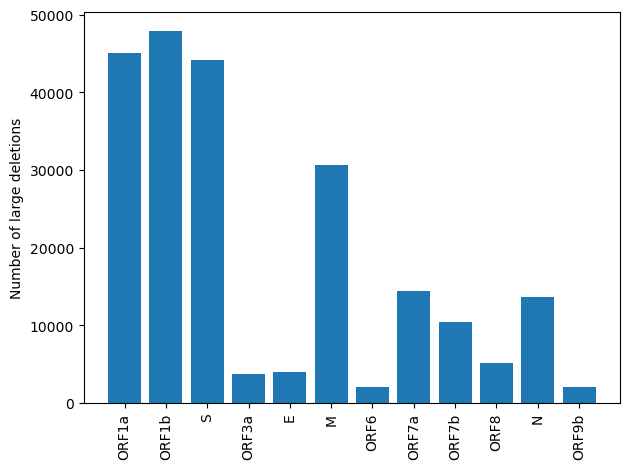

In [80]:
plot_bar(ko_df_ampl,'BigDeletion','Number of large deletions')

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_22296/1618512442.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genes,rotation=90)


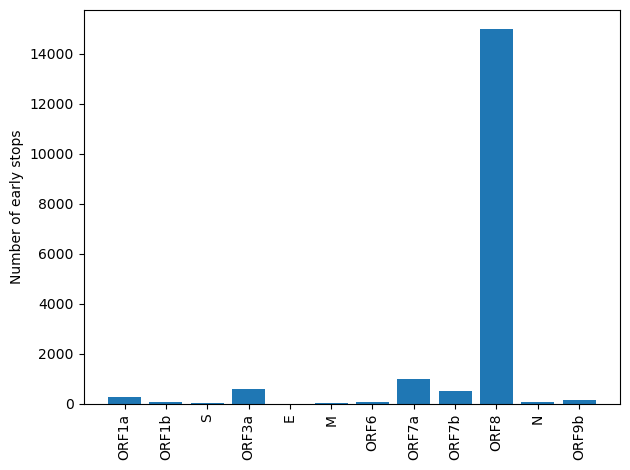

In [37]:
#plot_bar(ko_df,'earlyStop','Number of early stops',path='figs/fig2/ko_earlystop.pdf')
earlyStops = plot_bar(ko_df,'earlyStop','Number of early stops',norm=False)

In [38]:
earlyStops

{'ORF1a': 293,
 'ORF1b': 78,
 'S': 50,
 'ORF3a': 608,
 'E': 4,
 'M': 19,
 'ORF6': 69,
 'ORF7a': 1000,
 'ORF7b': 524,
 'ORF8': 15005,
 'N': 73,
 'ORF9b': 157}

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_22296/1314880171.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genes,rotation=90)


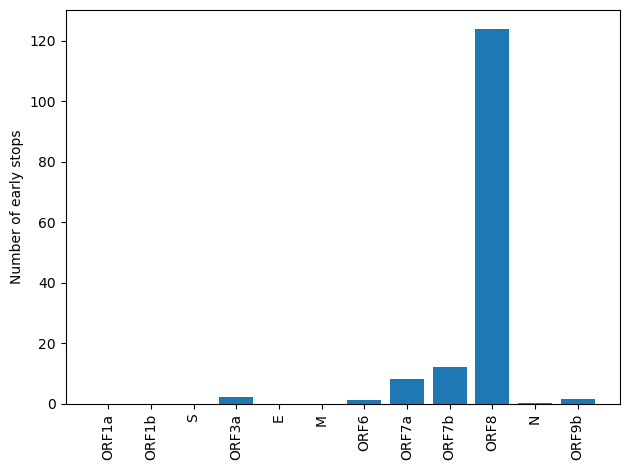

In [25]:
plot_bar(ko_df_ampl,'earlyStop','Number of early stops',norm=True)

In [26]:
clusters_df_ampl = load_clusters('nextstrain_build/results/WA_20k/clusters_with_amplicon')
clusters_df = load_clusters('nextstrain_build/results/WA_20k/clusters/')

In [27]:
clusters_df.head()

,cluster,depth,clustSize,koType,gene
0,1,2,1,earlyStop,ORF1a
1,2,4,3,earlyStop,ORF1a
2,3,2,1,earlyStop,ORF1a
3,4,2,1,earlyStop,ORF1a
4,5,2,1,earlyStop,ORF1a


In [28]:
clusters_df.koType.unique()

array(['earlyStop', 'bigDeletion'], dtype=object)

In [104]:
def plot_clusters(df,koType=None,lab=None,path=None):
    labs = genes.copy()
    locs = np.arange(len(genes))
    if koType:
        d = [df[(df.gene==gene)&(df.koType==koType)&(df.clustSize>1)]['clustSize'] for gene in genes]
        mean = [np.mean(df[(df.gene==gene)&(df.koType==koType)&(df.clustSize>1)]['clustSize']) for gene in genes]
        #d = [df[(df.gene==gene)&(df.koType==koType)]['clustSize'] for gene in genes]

    else:
        d = [df[(df.gene==gene)&(df.clustSize>1)]['clustSize'] for gene in genes]
        mean = [np.mean(df[(df.gene==gene)&(df.clustSize>1)]['clustSize']) for gene in genes]
        #d = [df[(df.gene==gene)&(df.clustSize>5)]['clustSize'] for gene in genes]


    fig,ax = plt.subplots(tight_layout=True,figsize=(5,4))
    for j,sizes in reversed(list(enumerate(d))):
        if not len(sizes):
            d.pop(j)
            locs = np.delete(locs,j)
            labs.pop(j)
    ax.violinplot(d,locs,showextrema=False,showmedians=True, showmeans=True)
    ax.set_xticks(locs,labs)
    ax.set_yscale('log')
    ax.set_xticklabels(labs,rotation=90)
    ax.set_ylabel('Size of KO cluster')
    if lab:
        ax.set_title(lab)
    if path:
        fig.savefig(path,dpi=300,bbox_inches='tight')
    return d,mean

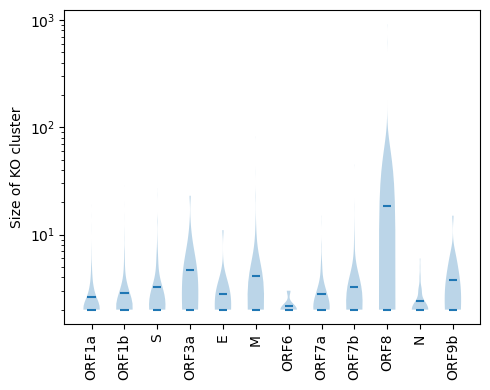

In [105]:
#plot_clusters(clusters_df,path='figs/fig2/clustSize.pdf')
d, mean = plot_clusters(clusters_df_ampl)

In [106]:
mean

[2.6135135135135137,
 2.8706365503080082,
 3.258522727272727,
 4.684210526315789,
 2.823529411764706,
 4.107981220657277,
 2.1818181818181817,
 2.802469135802469,
 3.257861635220126,
 18.660194174757283,
 2.4022988505747125,
 3.736842105263158]

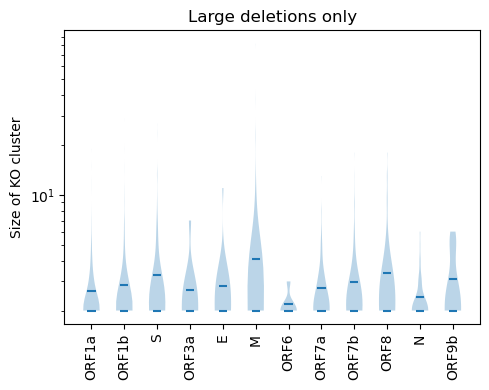

In [107]:
#plot_clusters(clusters_df,'bigDeletion','Large deletions only',path='figs/fig2/clustSize_bigDeletion.pdf')
d, mean = plot_clusters(clusters_df_ampl,'bigDeletion','Large deletions only')#,path='figs/fig2/clustSize_bigDeletion.pdf')

In [108]:
print(mean)

[2.614130434782609, 2.870103092783505, 3.2657142857142856, 2.6666666666666665, 2.823529411764706, 4.107981220657277, 2.1818181818181817, 2.7565789473684212, 2.987012987012987, 3.3684210526315788, 2.4096385542168677, 3.111111111111111]


In [109]:
len(d)

12

In [110]:
len(d)
st.f_oneway(d[2],d[9],d[5])

F_onewayResult(statistic=2.3870021877780294, pvalue=0.09272770389619855)

([1    3
  8    2
  Name: clustSize, dtype: int64,
  2    3
  3    3
  Name: clustSize, dtype: int64,
  12    2
  14    2
  Name: clustSize, dtype: int64,
  1      5
  3     11
  5      2
  6      4
  7      2
  9      7
  17     3
  25     2
  32     6
  33    23
  Name: clustSize, dtype: int64,
  3     15
  11     3
  17     2
  24     2
  31     2
  32     2
  37     3
  38     2
  41     2
  51     2
  Name: clustSize, dtype: int64,
  4     45
  7      4
  19     5
  22     2
  23     2
  Name: clustSize, dtype: int64,
  1        2
  10       2
  13       4
  14     910
  16       8
  18       3
  19      20
  23       2
  28      15
  29       3
  30       6
  45      28
  46       2
  52       2
  58       5
  62       3
  63       2
  64       3
  65       2
  66       3
  69       3
  73       5
  79       4
  85       2
  87      14
  89     611
  90       2
  106      2
  Name: clustSize, dtype: int64,
  6     3
  7     2
  15    2
  23    2
  Name: clustSize, dtype: int64,
 

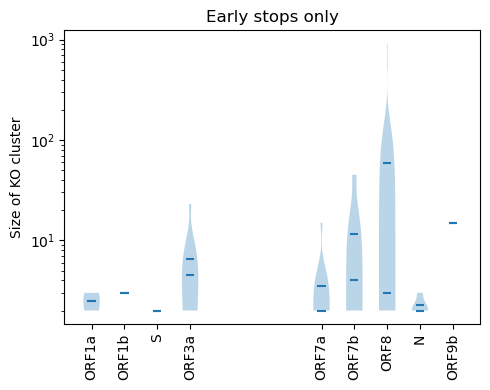

In [111]:
plot_clusters(clusters_df,'earlyStop','Early stops only')#,path='figs/fig2/clustSize_earlyStop.pdf')
#plot_clusters(clusters_df,'earlyStop','Early stops only',path='figs/fig2/clustSize_earlyStop.pdf')